# Space datasets description

In [13]:
import numpy as np
from spacebench import SpaceEnv, DataMaster
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
space_master = DataMaster()
space_master

Available datasets (total: 11):

  healthd_dmgrcs_mortality_disc
  cdcsvi_limteng_hburdic_cont
  climate_relhum_wfsmoke_cont
  climate_wfsmoke_minrty_disc
  healthd_hhinco_mortality_cont
  ...
  county_educatn_election_cont
  county_phyactiv_lifexpcy_cont
  county_dmgrcs_election_disc
  cdcsvi_nohsdp_poverty_cont
  cdcsvi_nohsdp_poverty_disc

In [3]:
space_master.master

,treatment_type,collection
environments,,
healthd_dmgrcs_mortality_disc,binary,Air Pollution and Mortality
cdcsvi_limteng_hburdic_cont,continuous,Social Vulnerability and Welfare
climate_relhum_wfsmoke_cont,continuous,Heat Exposure and Wildfires
climate_wfsmoke_minrty_disc,binary,Heat Exposure and Wildfires
healthd_hhinco_mortality_cont,continuous,Air Pollution and Mortality
healthd_pollutn_mortality_cont,continuous,Air Pollution and Mortality
county_educatn_election_cont,continuous,Welfare and Elections
county_phyactiv_lifexpcy_cont,continuous,Welfare and Elections
county_dmgrcs_election_disc,binary,Welfare and Elections


In [4]:
collections = space_master.list_collections()
collections

['Air Pollution and Mortality',
 'Social Vulnerability and Welfare',
 'Heat Exposure and Wildfires',
 'Welfare and Elections']

In [5]:
space_envs = space_master.list_envs()
space_envs

['healthd_dmgrcs_mortality_disc',
 'cdcsvi_limteng_hburdic_cont',
 'climate_relhum_wfsmoke_cont',
 'climate_wfsmoke_minrty_disc',
 'healthd_hhinco_mortality_cont',
 'healthd_pollutn_mortality_cont',
 'county_educatn_election_cont',
 'county_phyactiv_lifexpcy_cont',
 'county_dmgrcs_election_disc',
 'cdcsvi_nohsdp_poverty_cont',
 'cdcsvi_nohsdp_poverty_disc']

In [19]:
real_smoothness = []
synth_smoothness = []
for env_name in space_envs:
    env = SpaceEnv(env_name, dir='downloads')
    real_smoothness.append(float(env.metadata["original_residual_spatial_score"]))
    synth_smoothness.append(float(env.metadata["synthetic_residual_spatial_score"]))

In [20]:
df = pd.DataFrame({"real": real_smoothness, "synthetic": synth_smoothness})
df

,real,synthetic
0,0.116723,0.070199
1,0.123518,0.066716
2,0.521379,0.255366
3,0.525807,0.259109
4,0.087095,0.050996
5,0.107555,0.080942
6,0.154932,0.091741
7,0.119830,0.094292
8,0.155151,0.091805
9,0.088633,0.050120


/Users/mag7273/mambaforge/envs/benchmarks/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


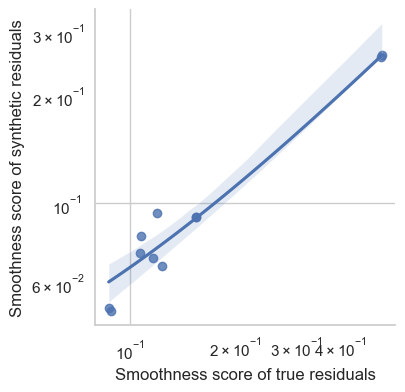

In [28]:
sns.set_theme(style="whitegrid")
# make plot in log scale
sns.lmplot(data=df, x="real", y="synthetic", height=4, aspect=1.0)
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Smoothness score of true residuals")
plt.ylabel("Smoothness score of synthetic residuals")
plt.savefig("examples/figures/residuals_smoothness_comparison.png", dpi=300, bbox_inches="tight")